In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use("ggplot")

In [2]:
def get_results(filename, rolling_mean = False, window = 10, num_agents=8, visualize = False):
    with open(filename, "r") as f:
        log = json.load(f)
         
        policy = log["policy"]
        episodes = log["episodes"]

        episodes_mean_reward = []
        episodes_mean_steps = []

        for i in range(0,len(episodes),num_agents):
            ep_rewards = [episodes[j][1]["episode_reward"] for j in range(i,i+num_agents)]
            episodes_mean_reward.append(np.mean(ep_rewards))
            episodes_mean_steps.append(np.mean([episodes[j][2]["episode_steps"] for j in range(i,i+num_agents)]))

        if rolling_mean:
            episodes_mean_reward = pd.DataFrame(episodes_mean_reward).rolling(window).mean()
            episodes_mean_steps = pd.DataFrame(episodes_mean_steps).rolling(window).mean()
            policy = pd.DataFrame(policy).rolling(window).mean()

        if visualize:
            _,axs = plt.subplots(3,1, figsize = (24,24))

            axs[0].plot(policy)
            axs[0].set_title("Policy Loss")
            axs[0].set_ylabel("Loss")
            axs[0].set_xlabel("Epochs")
        
            axs[1].plot(episodes_mean_steps)
            axs[1].set_ylabel("Mean Steps")
            axs[1].set_xlabel("Episodes")
            axs[1].set_title("Episode mean steps")

            axs[2].plot(episodes_mean_reward)
            axs[2].set_ylabel("Mean Reward")
            axs[2].set_xlabel("Episode")
            axs[2].set_title("Episode mean reward")

        return policy, episodes_mean_reward, episodes_mean_steps

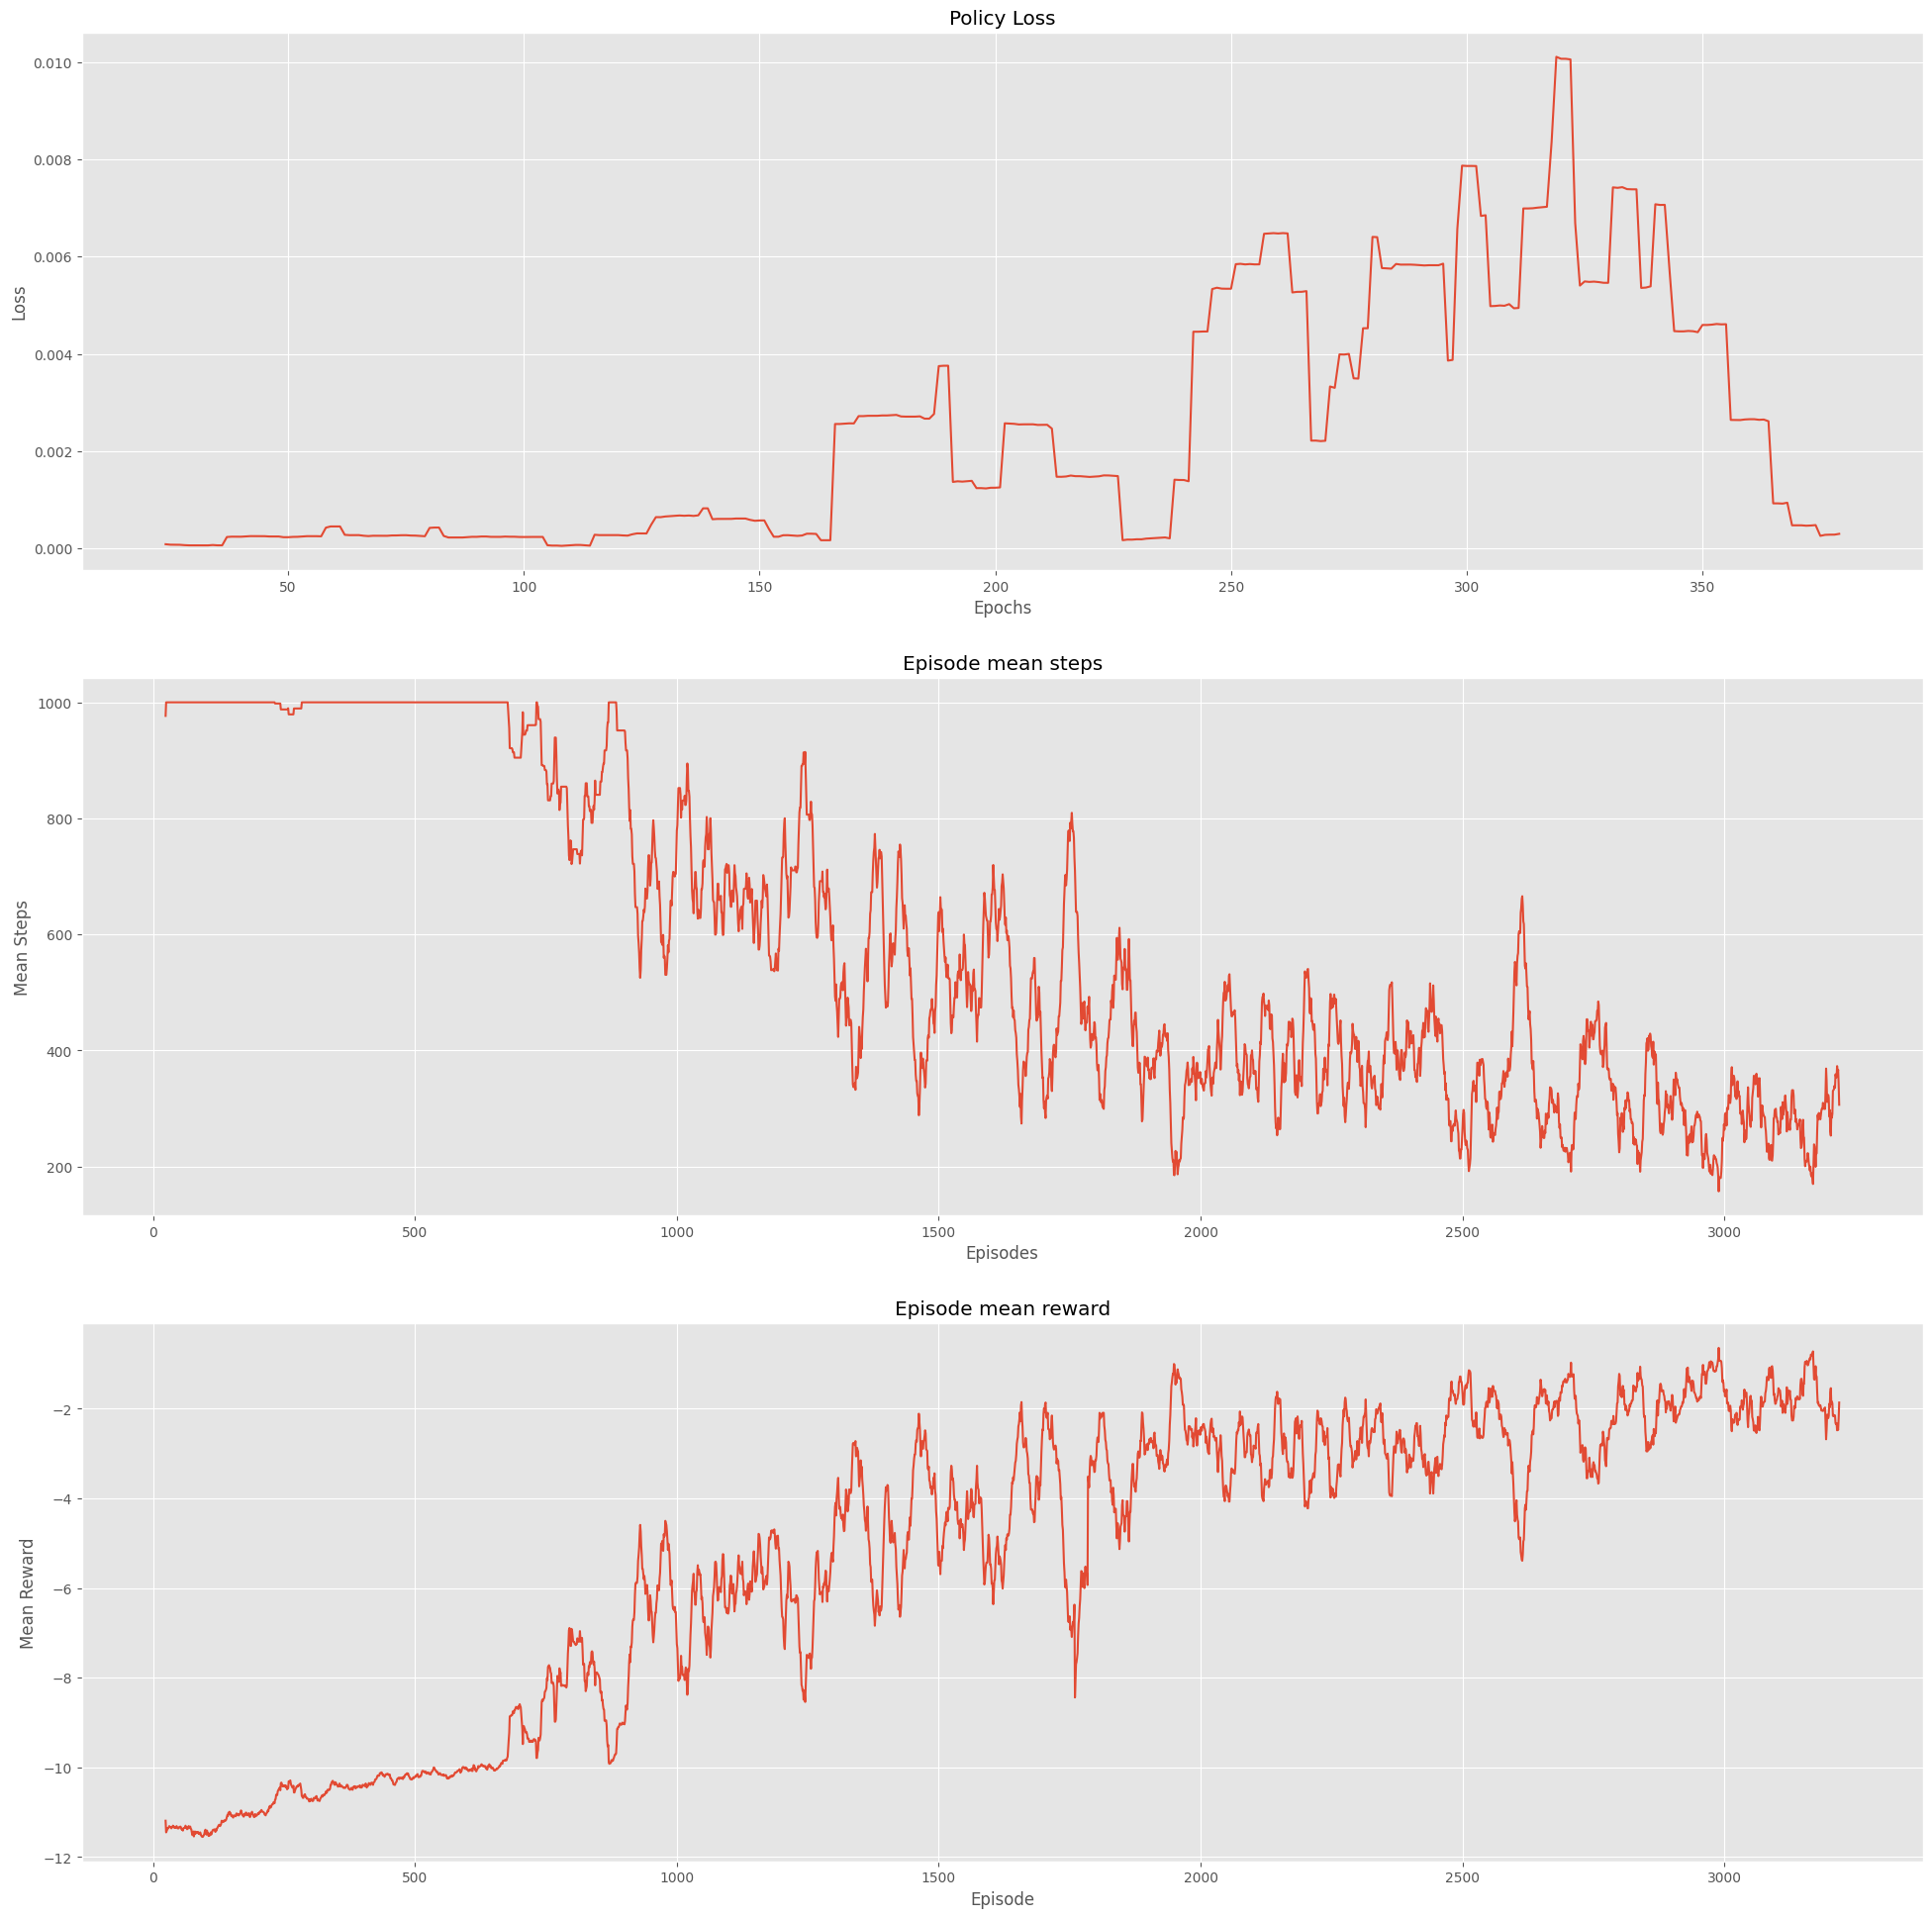

In [3]:
_ = get_results("results/4AgentsNoCommTrain/testRun//log.json", visualize=True,num_agents=4, rolling_mean=True, window=25)